In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('Resources/mainPop.csv')
df.head()

,ID,Cum GPA,TEAS Count,MaxOfTestScore,PrecEducDesc,failing grade count,DateStart,GradDate,Test Delivery Date,Time to Test (days),Completion Time (days),Grade,Qtr,Year
0,1,2.84,1.0,76.0,High School/GED/Some College,0,9/6/2016,4/20/2018,11/15/2018,209.00,591.0,Pass,2018-4,2018
1,2,3.14,1.0,74.7,High School/GED/Some College,0,9/10/2018,12/21/2019,3/3/2020,73.00,467.0,Pass,2020-1,2020
2,3,2.58,NaN,NaN,High School/GED/Some College,0,NaN,5/1/2009,3/29/2019,3619.34,39934.0,Pass,2019-1,2019
3,4,3.45,NaN,NaN,High School/GED/Some College,0,NaN,4/21/2017,5/27/2017,36.34,42846.0,Pass,2017-2,2017
4,5,3.22,1.0,75.3,High School/GED/Some College,0,5/18/2015,12/16/2016,3/10/2017,84.51,578.0,Pass,2017-1,2017


In [3]:
df.count()

ID                        1333
Cum GPA                   1333
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1333
failing grade count       1333
DateStart                 1331
GradDate                  1333
Test Delivery Date        1333
Time to Test (days)       1333
Completion Time (days)    1333
Grade                     1333
Qtr                       1333
Year                      1333
dtype: int64

In [4]:
df = df.dropna(how='any')
df.count()


ID                        1225
Cum GPA                   1225
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1225
failing grade count       1225
DateStart                 1225
GradDate                  1225
Test Delivery Date        1225
Time to Test (days)       1225
Completion Time (days)    1225
Grade                     1225
Qtr                       1225
Year                      1225
dtype: int64

In [5]:
# Source: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

df['newGrade'] = np.where(df['Grade']== 'Pass', 1, 0)
df['newPrevDegree'] = np.where(df['PrecEducDesc']== 'Pass', 1, 0)
df.head()

,ID,Cum GPA,TEAS Count,MaxOfTestScore,PrecEducDesc,failing grade count,DateStart,GradDate,Test Delivery Date,Time to Test (days),Completion Time (days),Grade,Qtr,Year,newGrade
0,1,2.84,1.0,76.0,High School/GED/Some College,0,9/6/2016,4/20/2018,11/15/2018,209.00,591.0,Pass,2018-4,2018,1
1,2,3.14,1.0,74.7,High School/GED/Some College,0,9/10/2018,12/21/2019,3/3/2020,73.00,467.0,Pass,2020-1,2020,1
4,5,3.22,1.0,75.3,High School/GED/Some College,0,5/18/2015,12/16/2016,3/10/2017,84.51,578.0,Pass,2017-1,2017,1
5,6,3.29,2.0,77.3,High School/GED/Some College,0,9/5/2017,4/19/2019,6/18/2019,60.00,591.0,Fail,2019-2,2019,0
6,7,3.38,2.0,72.7,Associates,0,1/7/2019,8/29/2020,11/17/2020,80.33,600.0,Pass,2020-4,2020,1


In [6]:
# Source: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

# create a list of our conditions
conditions = [
    (df['PrecEducDesc'] == "High School/GED/Some College"),
    (df['PrecEducDesc'] == "Associates"),
    (df['PrecEducDesc'] == "Bachelors"),
    (df['PrecEducDesc'] == "Masters")
    ]

# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
df['newPrevDegree'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,ID,Cum GPA,TEAS Count,MaxOfTestScore,PrecEducDesc,failing grade count,DateStart,GradDate,Test Delivery Date,Time to Test (days),Completion Time (days),Grade,Qtr,Year,newGrade,newPrevDegree
0,1,2.84,1.0,76.0,High School/GED/Some College,0,9/6/2016,4/20/2018,11/15/2018,209.00,591.0,Pass,2018-4,2018,1,1
1,2,3.14,1.0,74.7,High School/GED/Some College,0,9/10/2018,12/21/2019,3/3/2020,73.00,467.0,Pass,2020-1,2020,1,1
4,5,3.22,1.0,75.3,High School/GED/Some College,0,5/18/2015,12/16/2016,3/10/2017,84.51,578.0,Pass,2017-1,2017,1,1
5,6,3.29,2.0,77.3,High School/GED/Some College,0,9/5/2017,4/19/2019,6/18/2019,60.00,591.0,Fail,2019-2,2019,0,1
6,7,3.38,2.0,72.7,Associates,0,1/7/2019,8/29/2020,11/17/2020,80.33,600.0,Pass,2020-4,2020,1,2


In [7]:
# Assign the data to X and y

X = df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","newPrevDegree","Time to Test (days)","Completion Time (days)"]]

y = df["newGrade"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1225, 7) (1225, 1)


In [8]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### END SOLUTION

In [9]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.18906916280724043
Testing Score: 0.22064390312065285


Text(0.5, 1.0, 'Residual Plot')

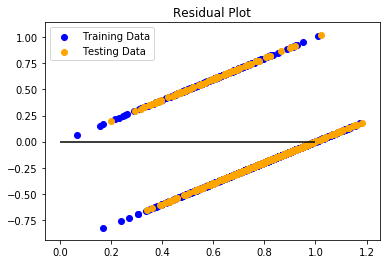

In [11]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION